In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [2]:
# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

In [3]:
data_folder = 'Sales'  
all_month_data_2022 = pd.DataFrame()
all_month_data_2023 = pd.DataFrame()

for i in range(1, 13):
    filename = os.path.join(data_folder, f'TT T{i}-2022_merged.csv')  
    if os.path.isfile(filename):
        data = pd.read_csv(filename)
        all_month_data_2022 = pd.concat([all_month_data_2022, data])
        
for i in range(1, 8):
    filename = os.path.join(data_folder, f'TT T{i}-2023_merged.csv')  
    if os.path.isfile(filename):
        data = pd.read_csv(filename)
        all_month_data_2023 = pd.concat([all_month_data_2023, data])


all_month_data_2022['month'] = pd.to_datetime(all_month_data_2022['month'], format='%Y%m').dt.strftime('%Y-%m')
all_month_data_2022['week'] = all_month_data_2022['week'].astype(str).str.slice(-2)
#all_month_data_2022.set_index(('month','week)', inplace=True)
all_month_data_2022

,month,week,region,store_concept,store_type,address_3,address_2,channel_id,distribution_channel,sales_season,final_status,mch_description,name_description,sold_quantity,cost_price,net_price,customer_id,product_id
0,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,17DE,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
1,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18AP,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
2,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18AU,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
3,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18DE,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
4,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,19AP,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384229,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 1,CHTT,Bán lẻ,22AU,KHÁC,NHÓM PHỤ KIỆN HUNTER,"Vớ Hunter, Đen, 25",1,52743,78000,a0c1d36b9,54f3f366e6904d51a459a7ca1efa6fc1DEN25
384230,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 1,CHTT,Bán lẻ,23AP,CORE,NHÓM PHỤ KIỆN HUNTER,"Vớ Hunter, Đen, 25",1,52743,78000,a0c1d36b9,54f3f366e6904d51a459a7ca1efa6fc1DEN25
384231,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,TGG,Tx. Gò Công,CHTT,Bán lẻ,22DE,NEW,NHÓM 88,"SanDal Si - PU Nữ 88, Trắng, 39",1,250364,368000,c93dd7759,d77dcb0befd14f7ca0956bfe43afcc2cTRG39
384232,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,TGG,Tx. Gò Công,CHTT,Bán lẻ,22AU,KHÁC,NHÓM 88,"SanDal Si - PU Nữ 88, Trắng, 39",1,250364,368000,c93dd7759,d77dcb0befd14f7ca0956bfe43afcc2cTRG39


In [4]:
all_month_data_2023['month'] = pd.to_datetime(all_month_data_2023['month'], format='%Y%m').dt.strftime('%Y-%m')
all_month_data_2023['week'] = all_month_data_2023['week'].astype(str).str.slice(-2)
all_month_data_2023

,month,week,region,store_concept,store_type,address_3,address_2,channel_id,distribution_channel,sales_season,final_status,mch_description,name_description,sold_quantity,cost_price,net_price,customer_id,product_id
0,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22AP,Core,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
1,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22AU,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
2,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22DE,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
3,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,23AP,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
4,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,23AU,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213699,2023-07,31,KVMT,Cửa hàng B thông thường,Độc lập,BLU,Tx. Giá Rai,CHTT,Bán lẻ,23AP,KHÁC,NHÓM PHỤ KIỆN HUNTER,"Ba Lô Trẻ Em, Đen, 23",1,373750,565000,069196bb7,fe34ca3c40064aa5918e7184db86aeceDEN23
213700,2023-07,31,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 12,CHTT,Bán lẻ,23AU,CORE,NHÓM EVA PHUN,"SanDal EVA Phun BGái, Đen, 39",1,217600,315000,8e5c342e2,c2186b5368944463a9201d998d6d3d18DEN39
213701,2023-07,31,KVMN,Cửa hàng B thông thường,Độc lập,BTE,Tp. Bến Tre,CHTT,Bán lẻ,23AP,NEW,NHÓM EVA PHUN,"Sandal thông dụng đế Eva phun B, Xám, 40",1,217600,315000,4305de5ca,aa710eeba0774944bafaae4f88b6aadaXAM40
213702,2023-07,31,KVMT,Cửa hàng B thông thường,Độc lập,KGG,Tp. Rạch Giá,CHTT,Bán sỉ,22DE,CORE,NHÓM XỐP,"Dép Xốp Nam, Xanh dương, 43",1,136000,158605,f4eb82368,51b811dd86bf4a34a37cdd0a0904cd08XDG43


In [5]:
# Assuming all_month_data_2022 and all_month_data_2023 are your DataFrames

# Function to filter and process data for a specific region
def get_top_values(region):
    # Filter data for the region in 2022
    region_2022 = all_month_data_2022[all_month_data_2022['region'] == region]['address_2']

    # Filter data for the region in 2023 and group by 'week'
    region_2023_grouped = all_month_data_2023[all_month_data_2023['region'] == region].groupby('week')['address_2'].sum()

    # Concatenate the two series
    combined_series = pd.concat([region_2022, region_2023_grouped])

    # Get the top 3 values
    top_3_values = combined_series.value_counts().head(3)

    return top_3_values

# Get top values for 'KVMN'
top_kvmn_values = get_top_values('KVMN')
print("Top values for KVMN:")
print(top_kvmn_values)

# Get top values for 'KVMB'
top_kvmb_values = get_top_values('KVMB')
print("\nTop values for KVMB:")
print(top_kvmb_values)

# Get top values for 'KVMT'
top_kvmt_values = get_top_values('KVMT')
print("\nTop values for KVMT:")
print(top_kvmt_values)


Top values for KVMN:
Q. 6            208214
Tp. Biên Hoà    190543
Q. Gò Vấp       190278
Name: address_2, dtype: int64

Top values for KVMB:
Q. Đống Đa     85794
Q. Hà Đông     60235
Q. Cầu Giấy    57806
Name: address_2, dtype: int64

Top values for KVMT:
Q. Ninh Kiều     189358
Tp. Rạch Giá      87239
Tp. Vĩnh Long     76797
Name: address_2, dtype: int64


In [6]:
result_by_week = all_month_data_2022.groupby('week').sum().append(all_month_data_2023.groupby('week').sum())
result_by_week_and_region = all_month_data_2022.groupby(['week', 'region']).sum().append(all_month_data_2023.groupby(['week', 'region']).sum())
result_by_week_and_region_and_address_2 = all_month_data_2022.groupby(['week', 'region', 'address_2']).sum().append(all_month_data_2023.groupby(['week', 'region', 'address_2']).sum())

result_KVMN = result_by_week_and_region.loc[(slice(None), 'KVMN'), :]
result_KVMB = result_by_week_and_region.loc[(slice(None), 'KVMB'), :]
result_KVMT = result_by_week_and_region.loc[(slice(None), 'KVMT'), :]

In [7]:
result_by_month = all_month_data_2022.groupby('month').sum().append(all_month_data_2023.groupby('month').sum())
result_by_month_and_region = all_month_data_2022.groupby(['month', 'region']).sum().append(all_month_data_2023.groupby(['month', 'region']).sum())
result_by_month_and_region_and_address_2 = all_month_data_2022.groupby(['month', 'region', 'address_2']).sum().append(all_month_data_2023.groupby(['month', 'region', 'address_2']).sum())

result_KVMN_month = result_by_month_and_region.loc[(slice(None), 'KVMN'), :]
result_KVMB_month = result_by_month_and_region.loc[(slice(None), 'KVMB'), :]
result_KVMT_month = result_by_month_and_region.loc[(slice(None), 'KVMT'), :]

In [8]:
#Week KVMN
result_1 = result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Q. 6'), :]
result_2 = result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Tp. Biên Hoà'), :]
result_3 = result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Q. Gò Vấp'), :]

In [9]:
#week KVMB
result_4 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Đống Đa'), :]
result_5 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Hà Đông'), :]
result_6 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Cầu Giấy'), :]

In [10]:
#week KVMT
result_7 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Q. Ninh Kiều'), :]
result_8 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Tp. Rạch Giá'), :]
result_9 =  result_by_week_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Tp. Vĩnh Long'), :]

In [11]:
#month KVMN
result_1_month = result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Q. 6'), :]
result_2_month = result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Tp. Biên Hoà'), :]
result_3_month = result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMN', 'Q. Gò Vấp'), :]

In [12]:
#month KVMB
result_4_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Đống Đa'), :]
result_5_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Hà Đông'), :]
result_6_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMB', 'Q. Cầu Giấy'), :]

In [13]:
#month KVMT
result_7_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Q. Ninh Kiều'), :]
result_8_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Tp. Rạch Giá'), :]
result_9_month =  result_by_month_and_region_and_address_2.loc[(slice(None), 'KVMT', 'Tp. Vĩnh Long'), :]

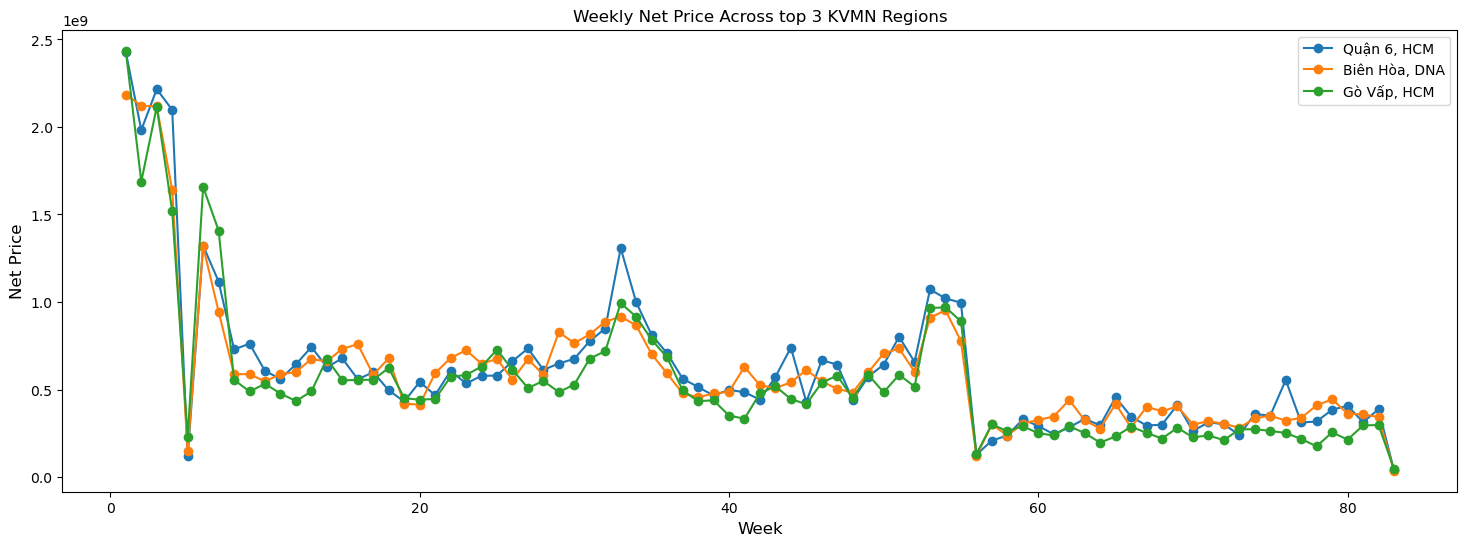

In [14]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(range(1, 84),result_1['net_price'], "Quận 6, HCM")
timeseries(range(1, 84),result_2['net_price'], "Biên Hòa, DNA")
timeseries(range(1, 84),result_3['net_price'], "Gò Vấp, HCM") 

plt.title("Weekly Net Price Across top 3 KVMN Regions")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


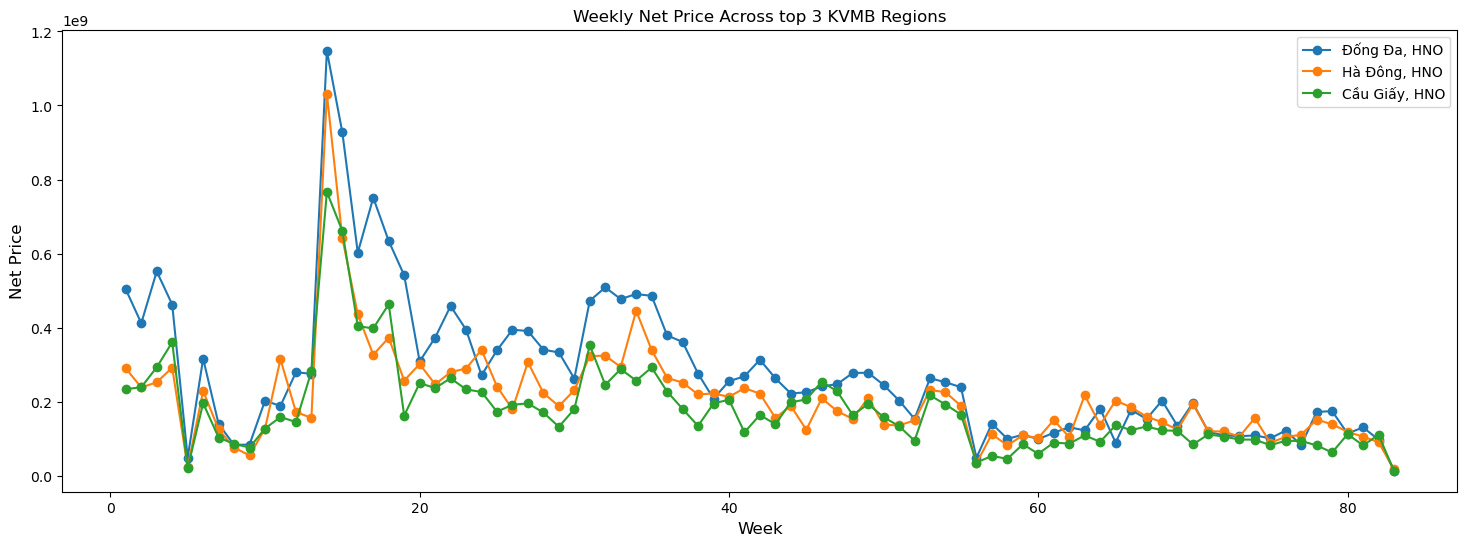

In [15]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(range(1, 84),result_4['net_price'], "Đống Đa, HNO")
timeseries(range(1, 84),result_5['net_price'], "Hà Đông, HNO")
timeseries(range(1, 84),result_6['net_price'], "Cầu Giấy, HNO") 

plt.title("Weekly Net Price Across top 3 KVMB Regions")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


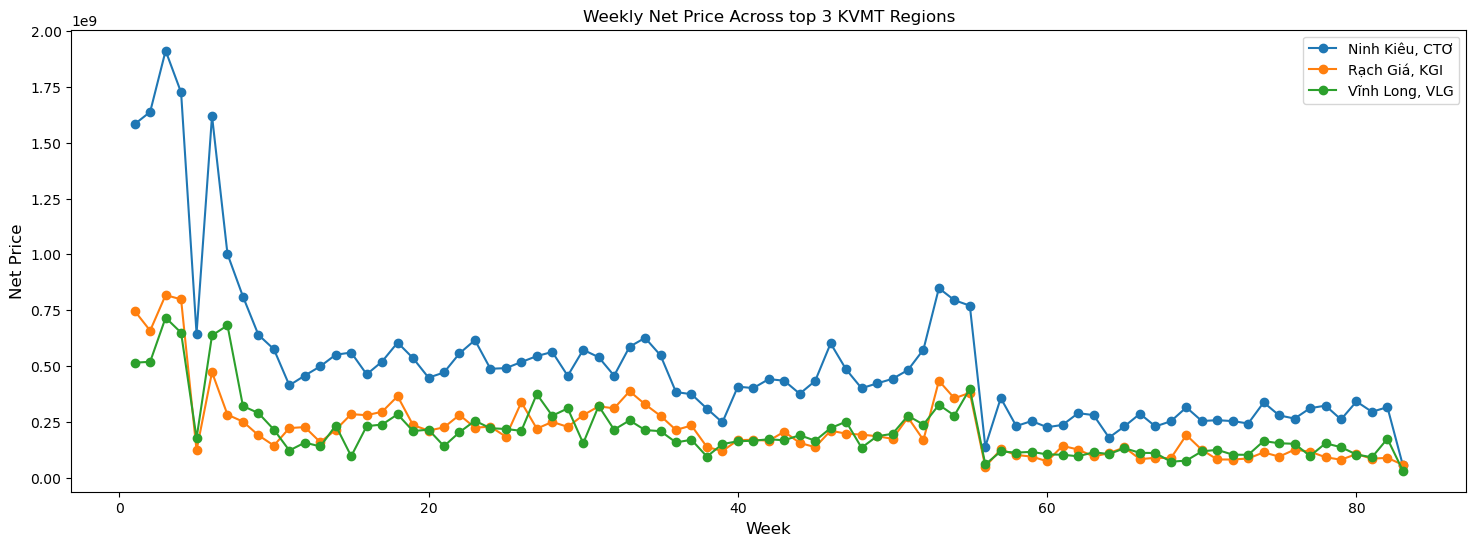

In [16]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(range(1, 84),result_7['net_price'], "Ninh Kiêu, CTƠ")
timeseries(range(1, 84),result_8['net_price'], "Rạch Giá, KGI")
timeseries(range(1, 84),result_9['net_price'], "Vĩnh Long, VLG") 

plt.title("Weekly Net Price Across top 3 KVMT Regions")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


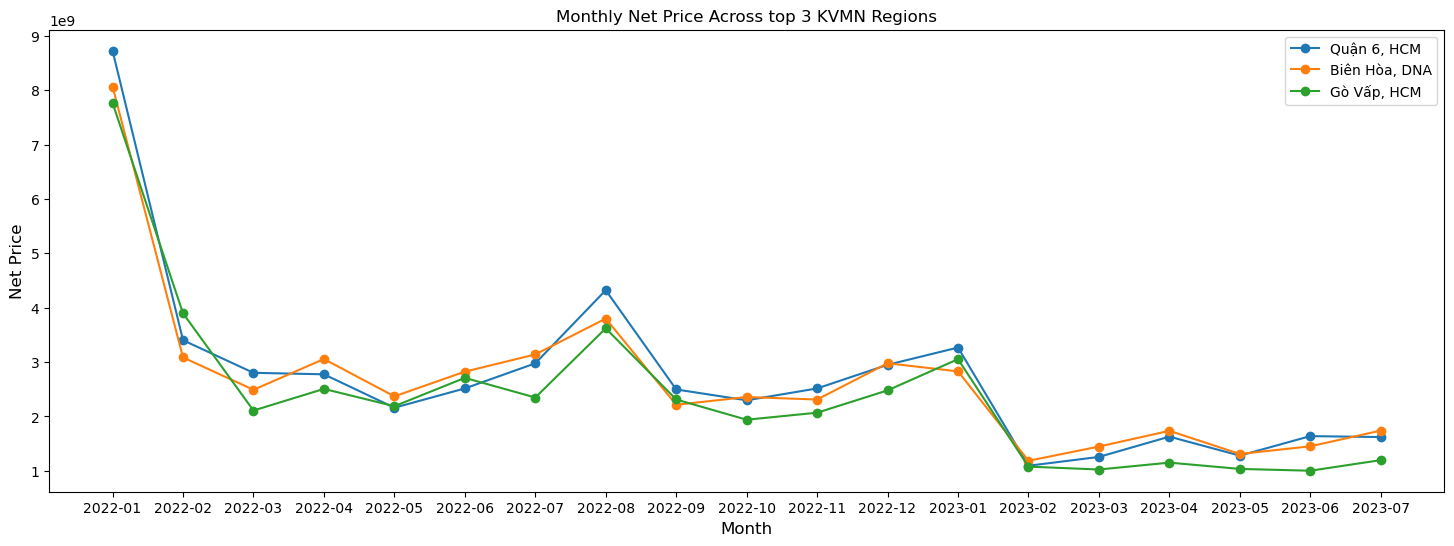

In [17]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(result_by_month.index,result_1_month['net_price'], "Quận 6, HCM")
timeseries(result_by_month.index,result_2_month['net_price'], "Biên Hòa, DNA")
timeseries(result_by_month.index,result_3_month['net_price'], "Gò Vấp, HCM") 

plt.title("Monthly Net Price Across top 3 KVMN Regions")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


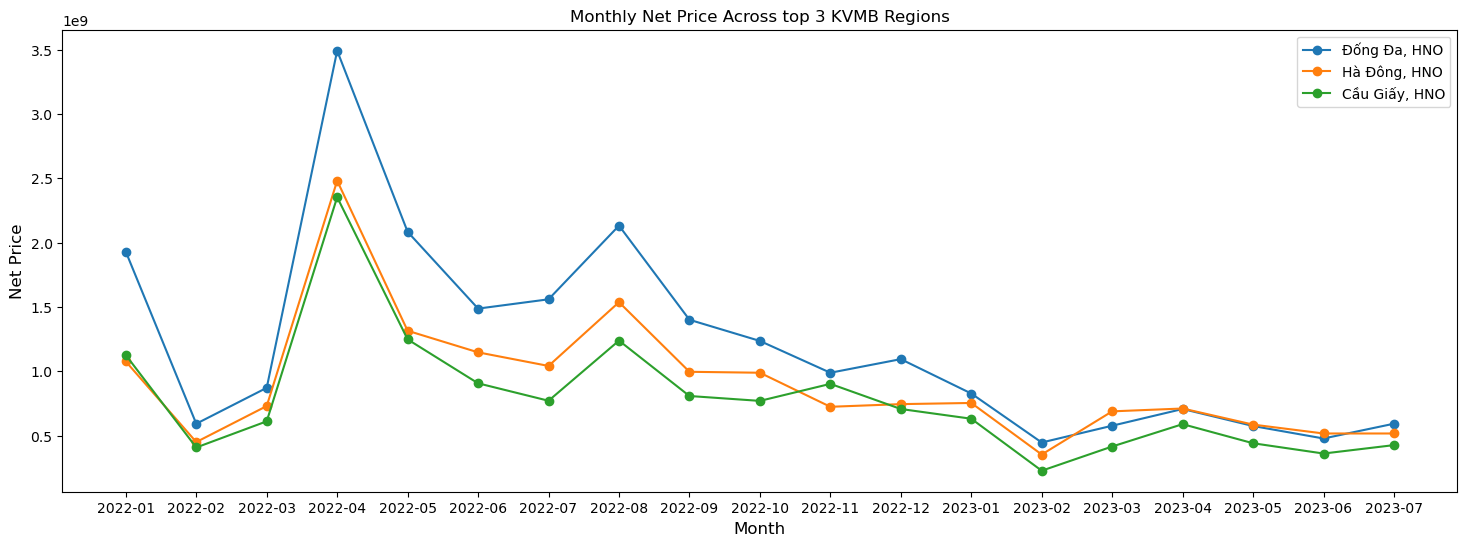

In [18]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(result_by_month.index,result_4_month['net_price'], "Đống Đa, HNO")
timeseries(result_by_month.index,result_5_month['net_price'], "Hà Đông, HNO")
timeseries(result_by_month.index,result_6_month['net_price'], "Cầu Giấy, HNO") 

plt.title("Monthly Net Price Across top 3 KVMB Regions")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


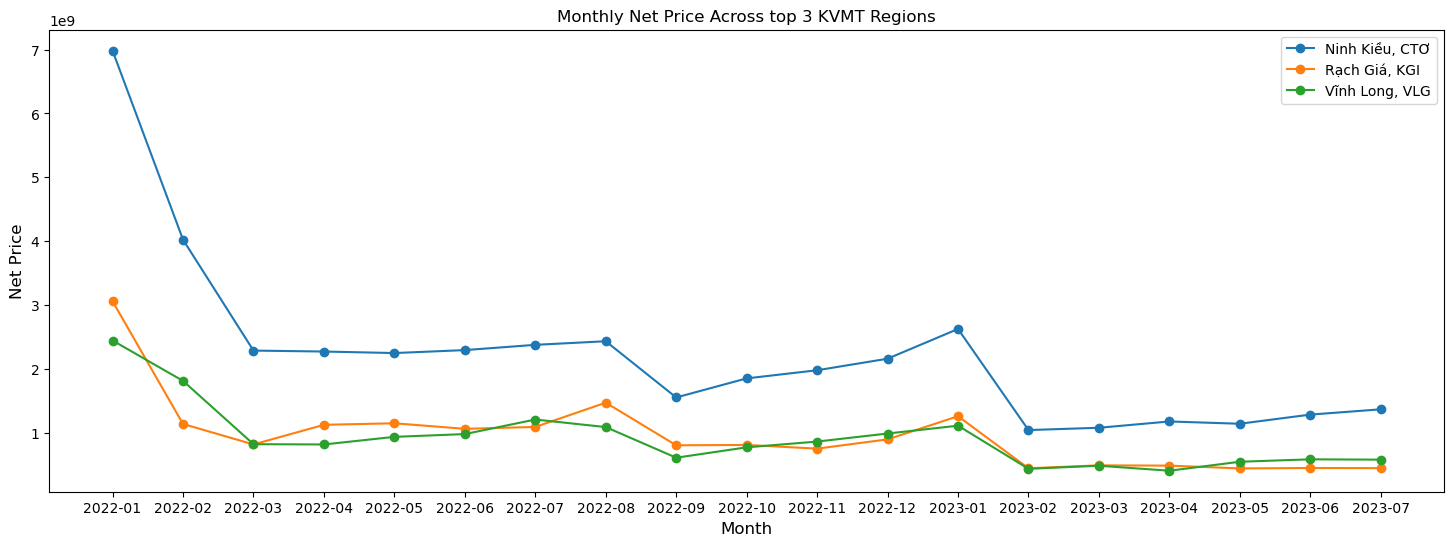

In [19]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(result_by_month.index,result_7_month['net_price'], "Ninh Kiều, CTƠ")
timeseries(result_by_month.index,result_8_month['net_price'], "Rạch Giá, KGI")
timeseries(result_by_month.index,result_9_month['net_price'], "Vĩnh Long, VLG") 

plt.title("Monthly Net Price Across top 3 KVMT Regions")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
# Hyperparameters
data_1 = result_1[['net_price']]
data_2 = result_2[['net_price']]
data_3 = result_3[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)

sequence_length = 79
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast for about 1 month

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [21]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)

# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[2.8807222e+08, 2.7632192e+08, 2.1626392e+08],
       [2.8324915e+08, 2.7072650e+08, 2.1159672e+08],
       [2.8668675e+08, 2.7741386e+08, 2.0650491e+08],
       [2.8682598e+08, 2.7428749e+08, 2.1716882e+08]], dtype=float32)

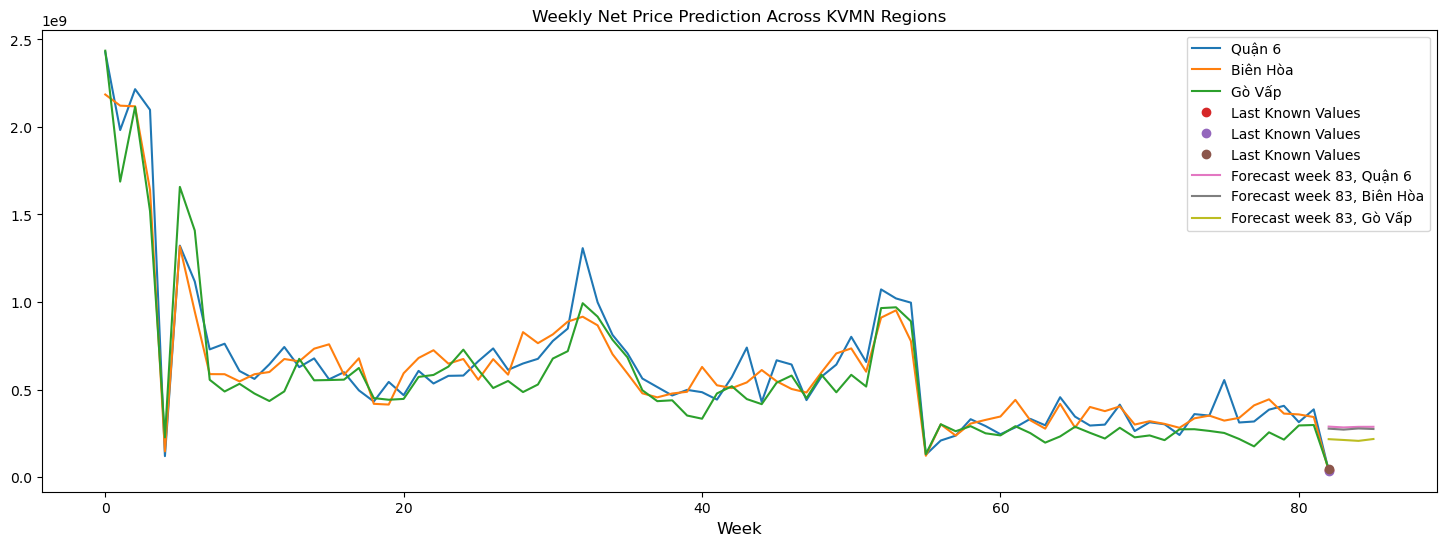

In [22]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data, label=['Quận 6', 'Biên Hòa', 'Gò Vấp'])
plt.title("Weekly Net Price Prediction Across KVMN Regions")
plt.xlabel("Week", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data.values[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values for each region and each day
for i in range(forecast_horizon):
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Quận 6')

     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Biên Hòa')
     
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
     predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Gò Vấp')

plt.legend()
plt.show()

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
# Hyperparameters
data_1 = result_4[['net_price']]
data_2 = result_5[['net_price']]
data_3 = result_6[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)

sequence_length = 79
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast for about 1 month

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [24]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)

# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300


Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78/300
Epoch 7

array([[90549312., 82855520., 79152416.],
       [87284680., 83586656., 79584600.],
       [87479136., 82792616., 79651272.],
       [90118520., 82967984., 79236488.]], dtype=float32)

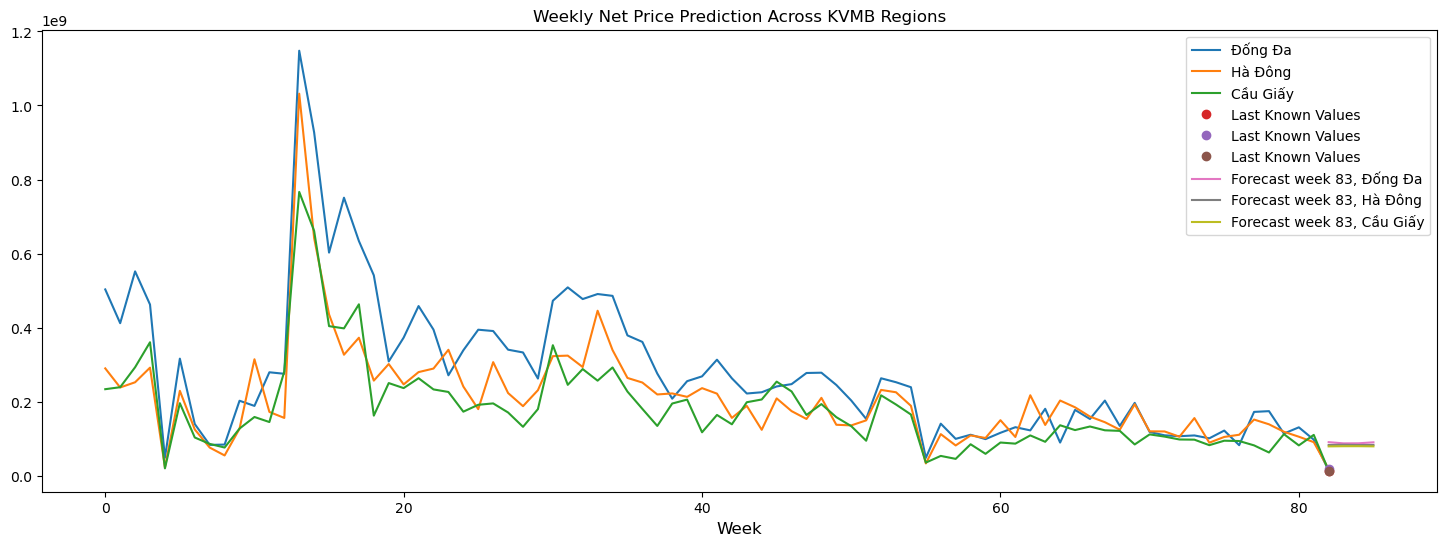

In [25]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data, label=['Đống Đa', 'Hà Đông', 'Cầu Giấy'])
plt.title("Weekly Net Price Prediction Across KVMB Regions")
plt.xlabel("Week", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data.values[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values for each region and each day
for i in range(forecast_horizon):
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Đống Đa')

     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Hà Đông')
     
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
     predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Cầu Giấy')

plt.legend()
plt.show()

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
# Hyperparameters
data_1 = result_7[['net_price']]
data_2 = result_8[['net_price']]
data_3 = result_9[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)

sequence_length = 79
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast for about 1 month

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [27]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)

# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[2.5227664e+08, 8.3792784e+07, 1.0041926e+08],
       [2.5140819e+08, 8.4702968e+07, 1.0039312e+08],
       [2.5597691e+08, 8.4810176e+07, 9.9665600e+07],
       [2.4684211e+08, 8.3503096e+07, 9.9455552e+07]], dtype=float32)

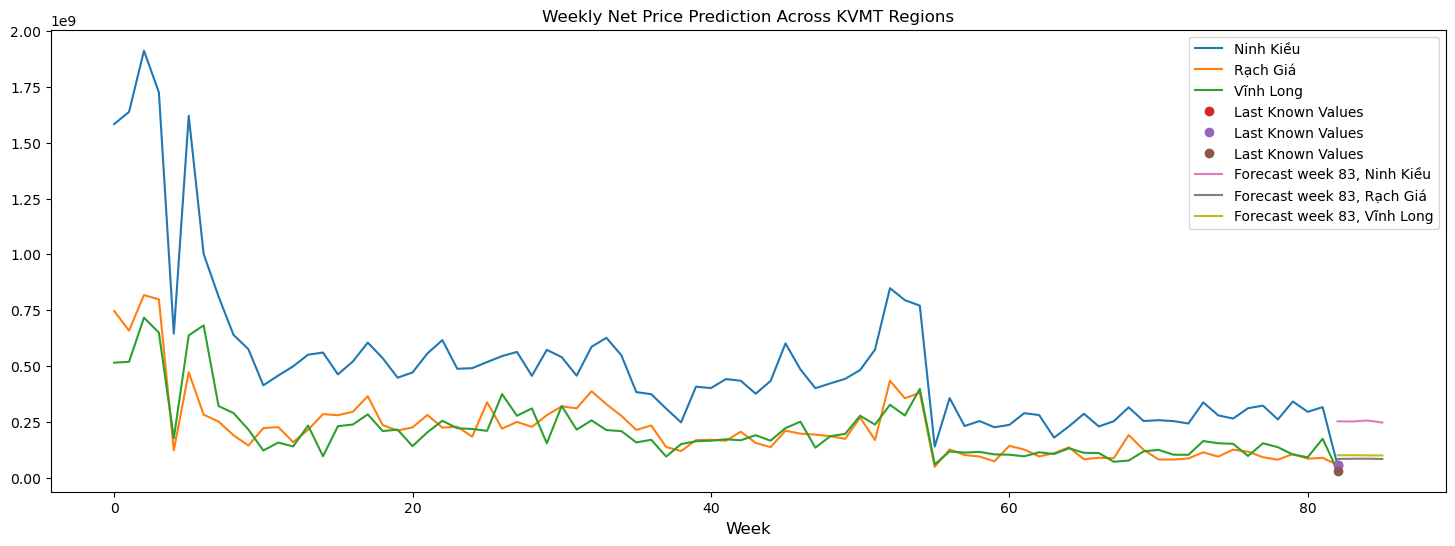

In [28]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data, label=['Ninh Kiều', 'Rạch Giá', 'Vĩnh Long'])
plt.title("Weekly Net Price Prediction Across KVMT Regions")
plt.xlabel("Week", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data.values[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values for each region and each day
for i in range(forecast_horizon):
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Ninh Kiều')

     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
             predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Rạch Giá')
     
     plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
     predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Vĩnh Long')

plt.legend()
plt.show()

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
np.random.seed(0)
# Replace this with your actual time series data
data_1 = result_1_month[['net_price']]
data_2 = result_2_month[['net_price']]
data_3 = result_3_month[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)


# Hyperparameters
sequence_length = 15
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [30]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)
# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[1.5408330e+09, 1.5581170e+09, 1.0972988e+09],
       [1.5500596e+09, 1.5674001e+09, 1.0918245e+09],
       [1.5374963e+09, 1.5596182e+09, 1.1018001e+09],
       [1.5403899e+09, 1.5525924e+09, 1.0953417e+09]], dtype=float32)

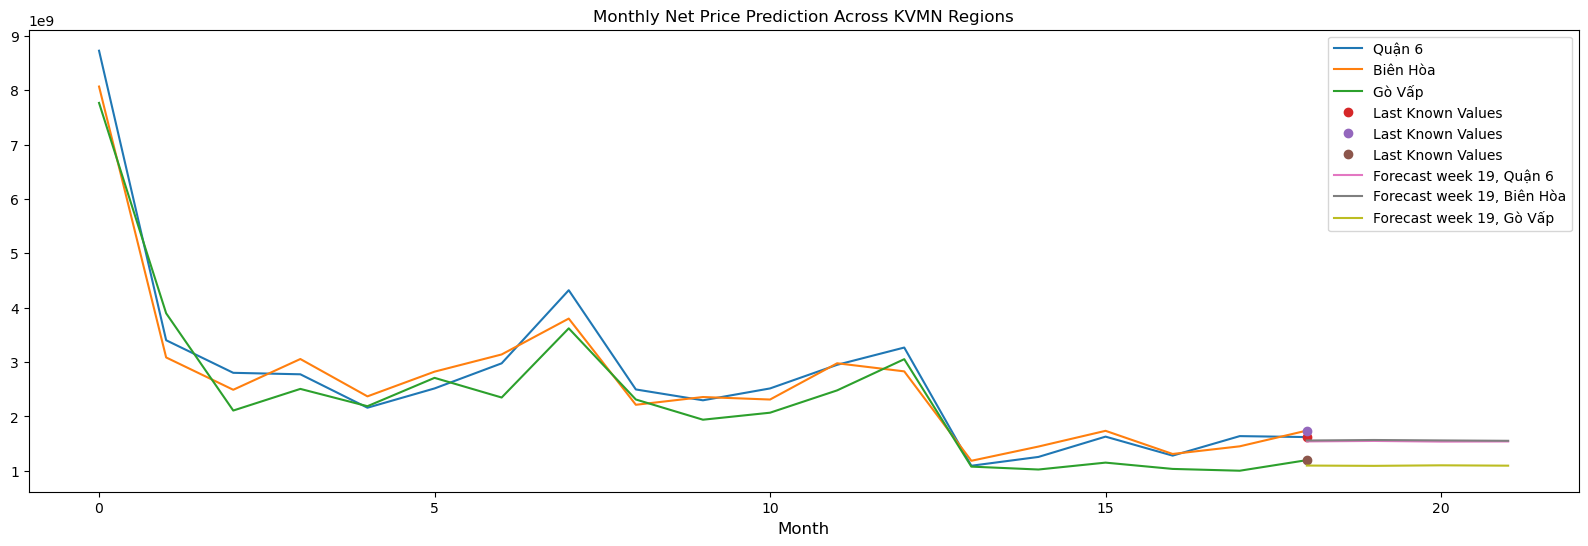

In [31]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(data, label=['Quận 6', 'Biên Hòa', 'Gò Vấp'])
plt.title("Monthly Net Price Prediction Across KVMN Regions")
plt.xlabel("Month", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values
for i in range(forecast_horizon):
    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Quận 6')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Biên Hòa')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Gò Vấp')

plt.legend()
plt.show()

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
np.random.seed(0)
# Replace this with your actual time series data
data_1 = result_4_month[['net_price']]
data_2 = result_5_month[['net_price']]
data_3 = result_6_month[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)


# Hyperparameters
sequence_length = 15
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [33]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)
# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[5.8899718e+08, 5.8407725e+08, 4.5692458e+08],
       [5.8744070e+08, 5.8048122e+08, 4.5182269e+08],
       [5.8915053e+08, 5.8444371e+08, 4.5572758e+08],
       [5.8802650e+08, 5.8206720e+08, 4.5404790e+08]], dtype=float32)

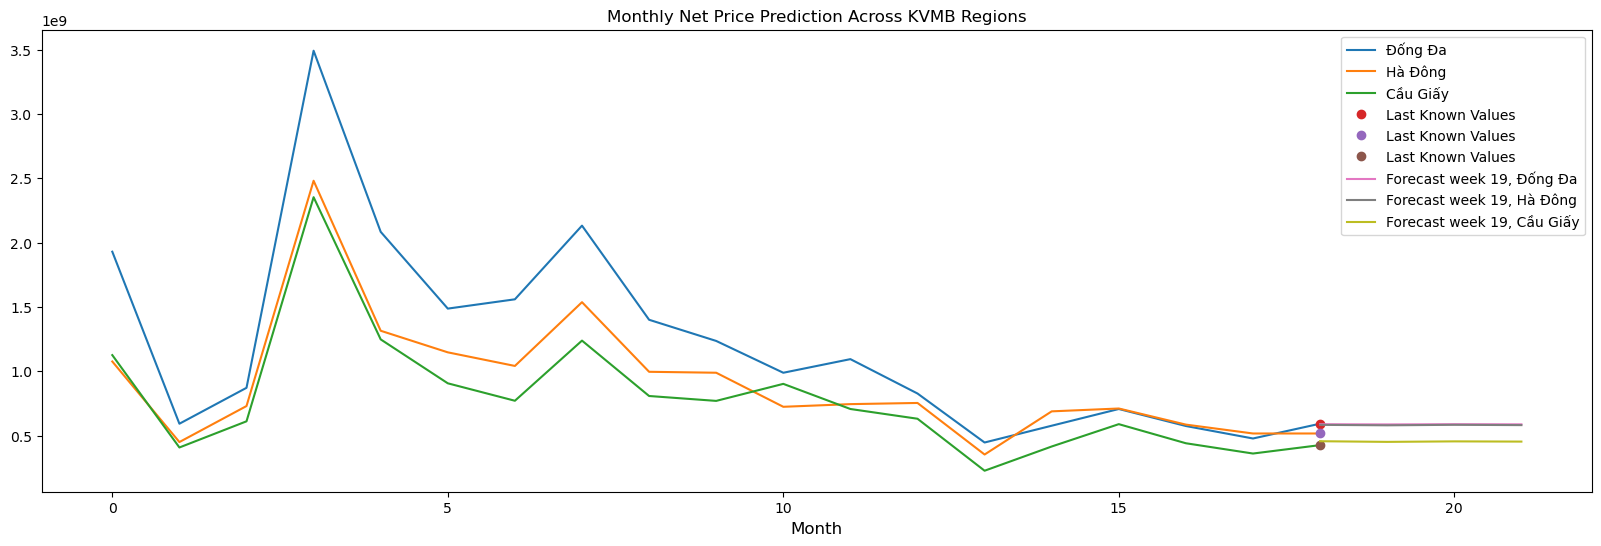

In [34]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(data, label=['Đống Đa', 'Hà Đông', 'Cầu Giấy'])
plt.title("Monthly Net Price Prediction Across KVMB Regions")
plt.xlabel("Month", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values
for i in range(forecast_horizon):
    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Đống Đa')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Hà Đông')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Cầu Giấy')

plt.legend()
plt.show()

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
np.random.seed(0)
# Replace this with your actual time series data
data_1 = result_7_month[['net_price']]
data_2 = result_8_month[['net_price']]
data_3 = result_9_month[['net_price']]

# Concatenate data from different regions
data_1 = data_1.reset_index(drop=True)  
data_2 = data_2.reset_index(drop=True)
data_3 = data_3.reset_index(drop=True)

data = pd.concat([data_1, data_2, data_3], axis=1)


# Hyperparameters
sequence_length = 15
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast

# Preprocess the combined data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []

for i in range(len(data) - sequence_length - forecast_horizon + 1):
    sequences.append(data_normalized[i:i + sequence_length])
    targets.append(data_normalized[i + sequence_length:i + sequence_length + forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

In [36]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(3 * forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)
# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale

Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[1.2407736e+09, 4.5379270e+08, 5.2728154e+08],
       [1.2416000e+09, 4.5323040e+08, 5.2627187e+08],
       [1.2392047e+09, 4.5457526e+08, 5.2866592e+08],
       [1.2423244e+09, 4.5312675e+08, 5.2601584e+08]], dtype=float32)

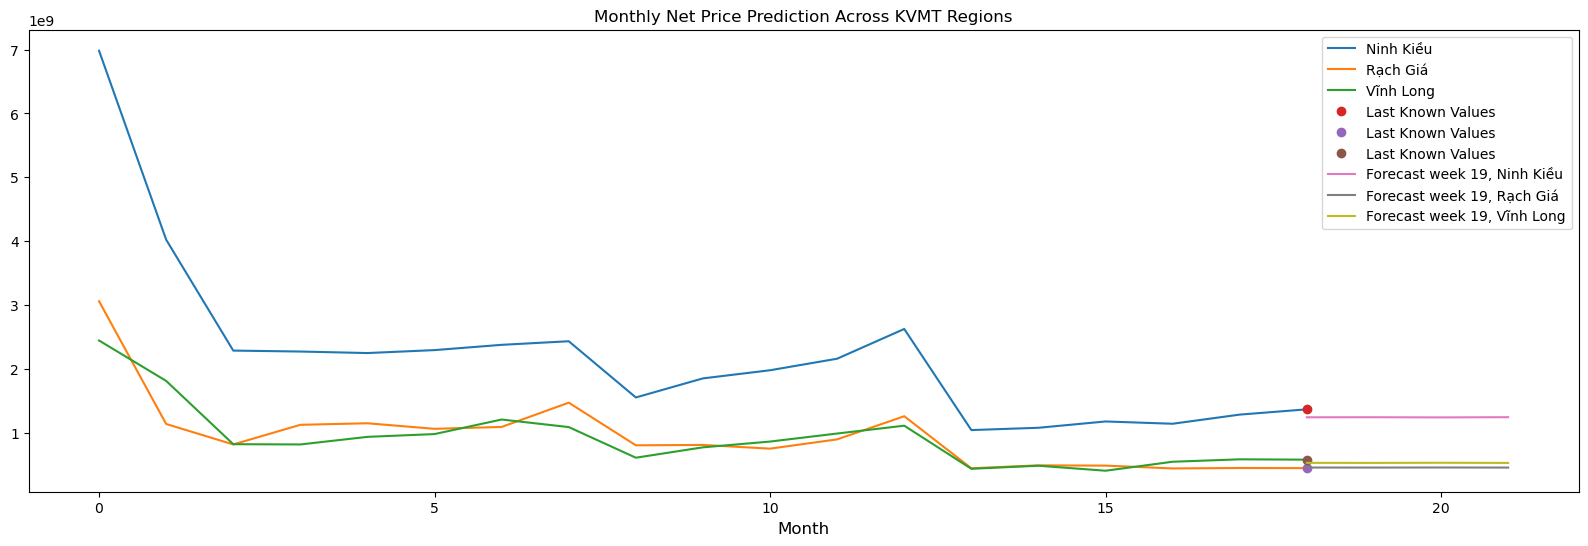

In [37]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(data, label=['Ninh Kiều', 'Rạch Giá ', 'Vĩnh Long'])
plt.title("Monthly Net Price Prediction Across KVMT Regions")
plt.xlabel("Month", fontsize=12)
# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values
for i in range(forecast_horizon):
    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i], label=f'Forecast week {len(data)}, Ninh Kiều')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + forecast_horizon], label=f'Forecast week {len(data)}, Rạch Giá')

    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)),
            predictions_original_scale[:, i + 2* forecast_horizon], label=f'Forecast week {len(data)}, Vĩnh Long')

plt.legend()
plt.show()